## GRIP Task 1: To Explore Supervised Machine Learning (Linear Regression)
### By Soham More
### Problem:  Prediction of the percentage scores of a student based on hours of study

### Importing the libraries

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Dataset

In [31]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url, error_bad_lines=False)
print("Data Imported")
df.head()

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding data

In [32]:
df.shape

(25, 2)

In [33]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
# checking datatypes of columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [35]:
# Checking for null value 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting data 

Text(0, 0.5, 'Scores')

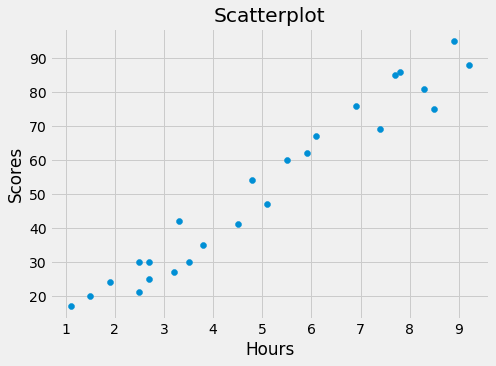

In [82]:
plt.figure(figsize=(7,5))
plt.scatter(df['Hours'], df['Scores'])
plt.title("Scatterplot")
plt.xlabel("Hours")
plt.ylabel("Scores")

# since the regression line can be well fitted on this problem

Text(0.5, 1.0, 'Distribution of Scores')

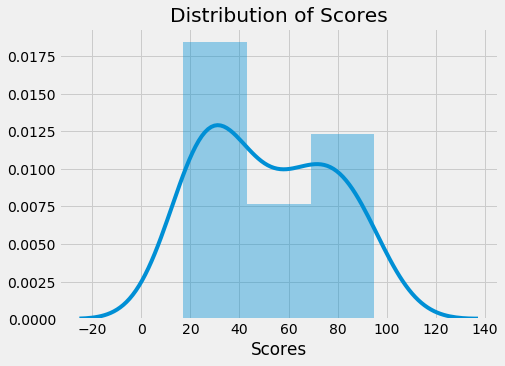

In [36]:
plt.figure(figsize=(7,5))
plt.style.use('fivethirtyeight')
sns.distplot(df['Scores'])
plt.title('Distribution of Scores')

Text(0.5, 1.0, 'Distribution of hours')

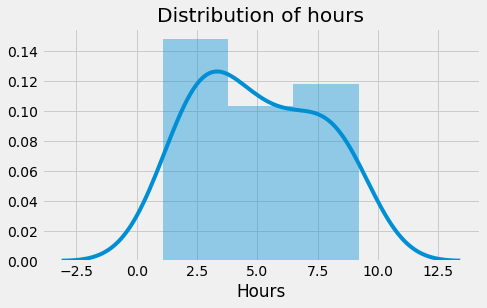

In [37]:
plt.figure(figsize=(7,4))
plt.style.use('fivethirtyeight')
sns.distplot(df['Hours'])
plt.title('Distribution of hours')

### Splitting up the data

In [68]:
x = df.iloc[:, :1].values
print(x.shape)
print(x)

(25, 1)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [69]:
y = df.iloc[:, -1].values
print(y.shape)
print(y)

(25,)
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [136]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [137]:
print(x_train.shape, x_test.shape)

(18, 1) (7, 1)


In [138]:
print(y_train.shape, y_test.shape)

(18,) (7,)


In [139]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Prediction

In [140]:
pred = lr.predict(x_test)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [141]:
data = list(zip(pred,y_test))
pred_actual_df = pd.DataFrame(data, columns=['Predictions', 'Actual'])
pred_actual_df

,Predictions,Actual
0,16.844722,20
1,33.745575,27
2,75.500624,69
3,26.786400,30
4,60.588106,62
5,39.710582,35
6,20.821393,24


### Evaluate 

In [144]:
print("Score on test",lr.score(x_test, y_test))
print("Score on train",lr.score(x_train, y_train))

Score on test 0.9367661043365054
Score on train 0.9484509249326872


In [143]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


### Prediction on user input 

In [146]:
prediction_score = lr.predict([[9.25]])
print("Predicted score of a student studying 9.25 hours:", prediction_score)

Predicted score of a student studying 9.25 hours: [93.89272889]


### Plotting regression on train, test and whole dataset

In [135]:
lr.coef_

array([9.78856669])

In [97]:
lr.intercept_

2.5200767068662344

In [145]:
line = lr.coef_*x + lr.intercept_

array([[26.7864001 ],
       [52.63476378],
       [33.74557494],
       [86.43647014],
       [36.72807844],
       [16.84472176],
       [93.39564498],
       [56.61143512],
       [84.44813447],
       [28.77473577],
       [78.48312747],
       [60.58810646],
       [46.66975678],
       [34.73974277],
       [12.86805043],
       [90.41314147],
       [26.7864001 ],
       [20.8213931 ],
       [62.57644212],
       [75.50062397],
       [28.77473577],
       [49.65226028],
       [39.71058194],
       [70.5297848 ],
       [79.4772953 ]])

Text(0, 0.5, 'Scores')

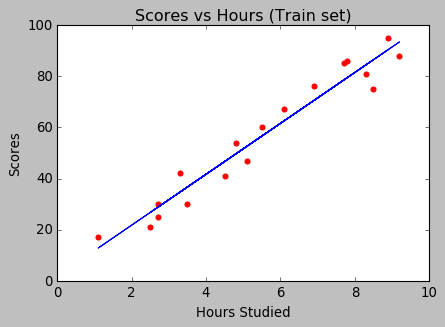

In [162]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Scores vs Hours (Train set)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')

Text(0, 0.5, 'Scores')

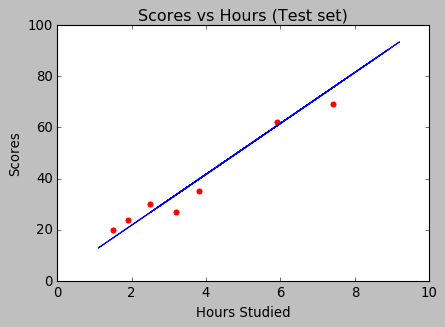

In [167]:
plt.figure(figsize=(6,4))
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')


Text(0, 0.5, 'Scores')

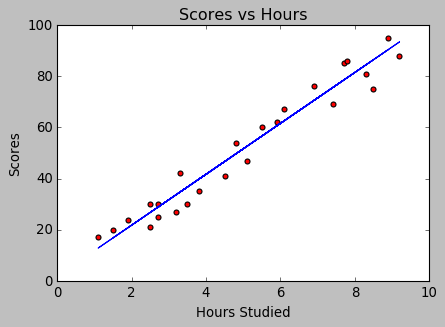

In [168]:
## Final Plot

plt.figure(figsize=(6,4))
plt.scatter(x, y, c='red')
plt.plot(x, line);
plt.title('Scores vs Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')